In [1]:
#2021.06.10. THUR
#Hankyeong

##Project 6: Konlpy를 이용하여 여친 선물 텍스트를 통해 워드 클라우드 만들기.
#00. 패키지 호출하기.  
import konlpy
import re
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import nltk
import numpy as np 
from konlpy.tag import Okt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

#00-1. 시각화 옵션 설정하기. 
%matplotlib inline
plt.rcParams["axes.unicode_minus"]=False
plt.rcParams["font.family"] = 'D2Coding'

#PLUS. Konlpy 버전 확인하기. 
konlpy.__version__

'0.5.2'

In [2]:
#01. 데이터셋 불러오기.  
with open('../../data/gift.txt', 'r', encoding='utf-8') as f:
    gift_text = f.read()

#02. 텍스트 데이터 전처리하기. 
#(1) Okt 객체 지정하기. 
okt = Okt()

#(2) 명사 추출하기. 
tokens = okt.nouns(gift_text)

#(3) 추출한 명사 첫 5개 확인하기. 
tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '추천', '제품']

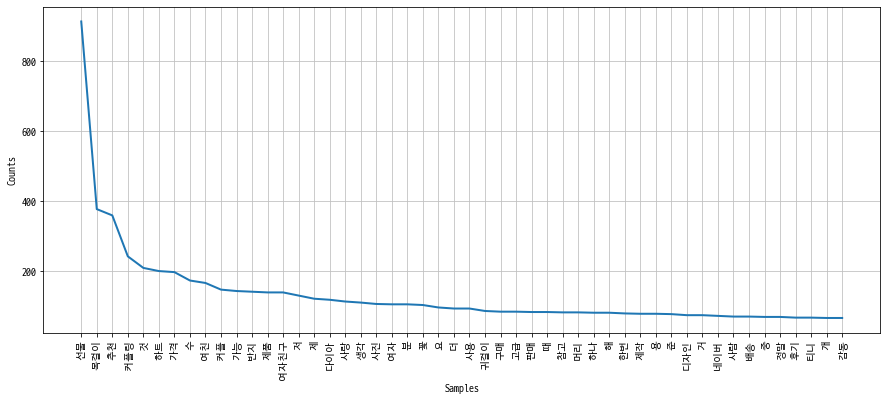

In [3]:
#(4) 추출한 명사에서 한글을 제외한 문자 삭제하기. 
new_tokens = []
for token in tokens:
    text = re.sub('[A-Za-z0-9]', '', token)
    if text:
        new_tokens.append(text)

#(5) 명사 빈도수 시각화하기. 
gf_gift = nltk.Text(new_tokens, name='여친선물')
plt.figure(figsize=(15,6))
gf_gift.plot(50)
plt.show()

In [4]:
#04. 불용어 전처리하기. 
#(1) 불용어 지정하기. 
stop_words = ['선물','추천','것','가격','여친','제품','여자친구','제','요','더','고급',
    '판매','때','참고','하나','해','한번','제작','용','준','디자인','거','네이버','사람',
    '배송','중','정말','후기','감동'
    '커플','가능','저','사랑','생각','사용','개','세대','인기','상품','직접','브랜드',
    '선택','곳','모양','마감','요즘','오늘','가지','남녀','그냥','위','페이',
    '마음','부담','남자','협찬','전','핸드','의미','변경','도움','색상','아래','포장',
    '처','조금',
    '하루','정도','처리','보시','심플','가장','여성','때문','정보',
    '독서','주소','쇼핑','링크','이니셜','기념일',
    '헤어','질문','친구','스토어','아주','할인',
    '스','이면','남','지금','센스','수', '구매', '감동']

#(2) 불용어를 지정한 새로운 token 정의하기. 
new_tokens = [word for word in new_tokens if word not in stop_words]

#(3) 새로운 token 확인하기. 
new_tokens[:10]

['반지', '목걸이', '커플', '가디건', '커플', '모자', '신지', '몇개', '투척', '클래식']

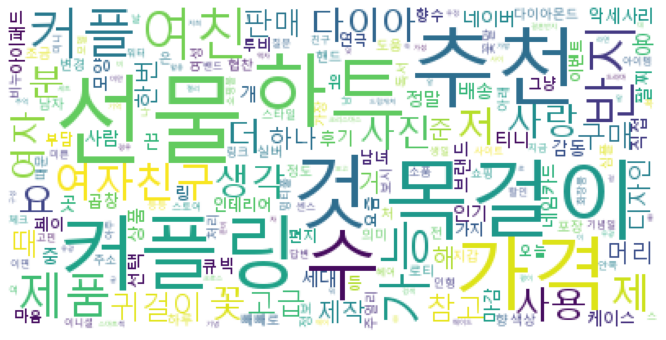

In [5]:
#05. wordcloud 생성하기. 
#(1) 데이터셋 생성하기. 
data = gf_gift.vocab().most_common(300)

#(2) wordcloud 객체 지정하기. 
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling=0.2,
    background_color='white'
).generate_from_frequencies(dict(data))

#(3) 시각화하기. 
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.show()

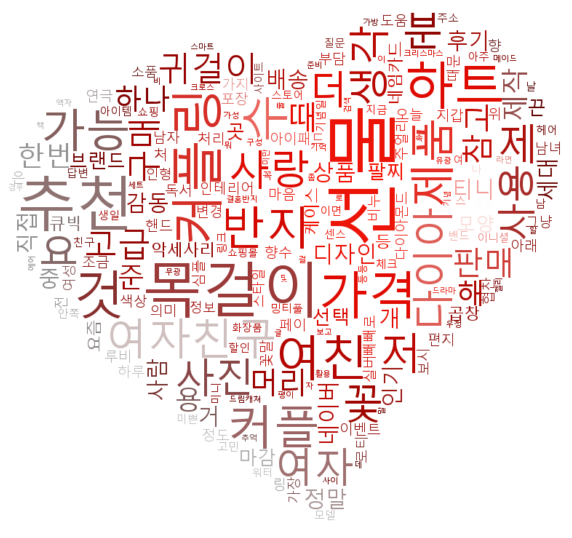

In [6]:
#PLUS. 그림 위에 표시하기. 
mask = np.array(Image.open('../../data/image/heart.jpg'))
image_colors = ImageColorGenerator(mask)
wc = WordCloud(
    font_path='c:/Windows/Fonts/malgun.ttf',
    relative_scaling = 0.3, mask=mask,
    background_color = 'white',
    min_font_size=1, max_font_size=100
).generate_from_frequencies(dict(data))
default_colors = wc.to_array()
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()